In [1]:
import pandas as pd
from datetime import datetime
import time
import numpy as np
import pandas as pd
import io

In [2]:
df = pd.read_csv('aapl_all_csv.csv')
# Inspect the data

df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

In [3]:
data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))
train_data_date = data_date[0:int(training_data_date), :]

In [4]:
import tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense, Input, Embedding, Dropout, Activation, Conv1D
from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:

import tensorflow as tf
print(tf.__version__)

2.8.0


In [6]:
data = pd.DataFrame()
data['Close']=df['Close']
count_nan = len(df) - df.count()
print(count_nan)

Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64


In [7]:
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
# training_data_len = math.ceil( len(dataset) *.6)
training_data_len = math.ceil( len(dataset)*.95) 



#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)    


#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [8]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])



#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [9]:
dataDimension = int(x_train.shape[1]) 

In [10]:
cell = "FastRNN" 
 
inputDims = 1 #features taken in by RNN in one timestep
hiddenDims = 50 #hidden state of RNN
 
totalEpochs = 8
batchSize = 64
 
learningRate = 0.001 
decayStep = 50
decayRate = 0.1
 
outFile = None
 

wRank = None 
uRank = None 
 

sW = 1.0 
sU = 1.0
 
#Non-linearities for the RNN architecture. Can choose from "tanh, sigmoid, relu, quantTanh, quantSigm"
update_non_linearity = "relu"
gate_non_linearity = "relu"


cell == "FastRNN"

True

In [11]:
print(x_train.shape)
x_train = np.reshape(x_train,[x_train.shape[0],x_train.shape[1],1])
print(x_test.shape)
x_test = np.reshape(x_test,[x_test.shape[0],x_test.shape[1],1])
print(x_train.shape)
print(x_test.shape)

(12672, 60, 1)
(670, 60, 1)
(12672, 60, 1)
(670, 60, 1)


Epoch 1/100
198/198 [==============================] - 56s 241ms/step - loss: 0.0047
Epoch 2/100
198/198 [==============================] - 66s 336ms/step - loss: 1.2781e-04
Epoch 3/100
198/198 [==============================] - 69s 349ms/step - loss: 9.3571e-05
Epoch 4/100
198/198 [==============================] - 67s 338ms/step - loss: 6.9844e-05
Epoch 5/100
198/198 [==============================] - 65s 330ms/step - loss: 6.7355e-05
Epoch 6/100
198/198 [==============================] - 64s 323ms/step - loss: 6.1291e-05
Epoch 7/100
198/198 [==============================] - 64s 323ms/step - loss: 5.9568e-05
Epoch 8/100
198/198 [==============================] - 64s 325ms/step - loss: 6.0995e-05
Epoch 9/100
198/198 [==============================] - 71s 361ms/step - loss: 6.1137e-05
Epoch 10/100
198/198 [==============================] - 68s 343ms/step - loss: 5.8280e-05
Epoch 11/100
198/198 [==============================] - 65s 331ms/step - loss: 5.7711e-05
Epoch 12/100
198/198 [=

198/198 [==============================] - 33s 165ms/step - loss: 4.3471e-05
Epoch 93/100
198/198 [==============================] - 32s 160ms/step - loss: 4.2359e-05
Epoch 94/100
198/198 [==============================] - 31s 159ms/step - loss: 4.2900e-05
Epoch 95/100
198/198 [==============================] - 32s 162ms/step - loss: 4.3193e-05
Epoch 96/100
198/198 [==============================] - 32s 161ms/step - loss: 4.2358e-05
Epoch 97/100
198/198 [==============================] - 32s 161ms/step - loss: 4.6490e-05
Epoch 98/100
198/198 [==============================] - 33s 165ms/step - loss: 4.1427e-05
Epoch 99/100
198/198 [==============================] - 32s 161ms/step - loss: 4.2609e-05
Epoch 100/100
198/198 [==============================] - 32s 162ms/step - loss: 4.1749e-05


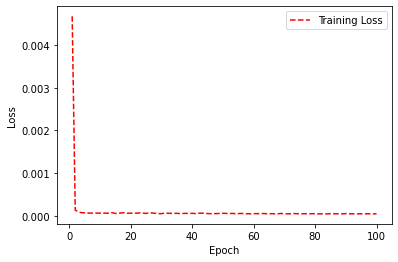

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
import matplotlib.pyplot as plt

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
regressor.add(Conv1D(filters=300, kernel_size=3 , padding='same', activation='relu', name='Conv1D'))
regressor.add(MaxPooling1D(pool_size=1,name='MaxPooling1D'))


#Adding the second RNN layer and some Dropout regularization
regressor.add(Bidirectional(LSTM(units=50, return_sequences=False)))
regressor.add(Dense(1))
# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = regressor.fit(x_train, y_train, batch_size=64, epochs=100)

# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


In [13]:
# Get the models predicted price values 
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


0.1261232037400272

In [14]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

train = data[:training_data_len]
valid_3 = data[training_data_len:]
valid_3['Predictions'] = predictions

mape(valid_3['Close'], valid_3['Predictions'])

<ipython-input-14-ffc677cae395>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['Predictions'] = predictions


0.053546024547577474

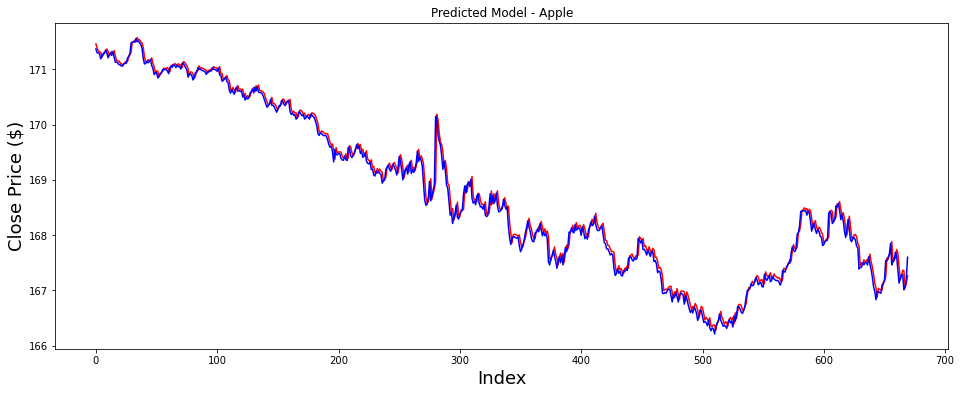

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Predicted Model - Apple')
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
#plt.plot(train['Close'], 'b-', label = 'train')
plt.plot(predictions,'r-', label = 'predict')
plt.plot(y_test,'b-', label = 'actual')
#plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 Conv1D (Conv1D)             (None, 60, 300)           45300     
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 60, 300)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 100)              140400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 188,401
Trainable params: 188,401
Non-trainable params: 0
__________________________________________________